In [2]:
import polars as pl
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load Dataset

In [3]:
df = pl.read_csv('../DATA/anemia_dataset.csv')

In [9]:
df.head()

Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic,,_duplicated_0,_duplicated_1,_duplicated_2,_duplicated_3,_duplicated_4,_duplicated_5
i64,str,f64,f64,f64,f64,str,str,str,str,str,str,str,str
1,"""Jafor Alam""",43.2555,30.8421,25.9025,6.3,"""Yes""",null,null,null,null,null,null,null
2,"""khadiza""",45.6033,28.19,26.2067,13.5,"""No""",null,null,null,null,null,null,null
3,"""Lalu""",45.0107,28.9677,26.0215,11.7,"""No""",null,null,null,null,null,null,null
4,"""Mira nath""",44.5398,28.9899,26.4703,13.5,"""No""",null,null,null,null,null,null,null
5,"""monoara""",43.287,30.6972,26.0158,12.4,"""No""",null,null,null,null,null,null,null


In [14]:
df = df.select(
    pl.col('Number'),
    pl.col('Name'),
    pl.col('%Red Pixel'),
    pl.col('%Green pixel'),
    pl.col('%Blue pixel'),
    pl.col('Hb'),
    pl.col('Anaemic')
)

In [15]:
df.shape

(104, 7)

In [16]:
df.columns

['Number',
 'Name',
 '%Red Pixel',
 '%Green pixel',
 '%Blue pixel',
 'Hb',
 'Anaemic']

In [20]:
df.describe()

statistic,Number,Name,%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
str,f64,str,f64,f64,f64,f64,str
"""count""",104.0,"""104""",104.0,104.0,104.0,104.0,"""104"""
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,"""0"""
"""mean""",52.5,null,45.654175,28.875507,25.470325,12.150962,null
"""std""",30.166206,null,2.816294,1.554275,1.984671,2.512957,null
"""min""",1.0,"""Abdurrahim""",38.7968,25.1403,19.5413,2.8,"""No"""
"""25%""",27.0,null,43.9224,27.9181,24.9474,10.7,null
"""50%""",53.0,null,45.4201,28.9677,25.9994,12.6,null
"""75%""",78.0,null,46.9597,29.8506,26.7204,14.0,null
"""max""",104.0,"""zidan""",54.6478,32.3681,29.8414,16.3,"""Yes"""


In [23]:
df = df.drop(['Number', 'Name'])

In [24]:
df.head()


%Red Pixel,%Green pixel,%Blue pixel,Hb,Anaemic
f64,f64,f64,f64,str
43.2555,30.8421,25.9025,6.3,"""Yes"""
45.6033,28.19,26.2067,13.5,"""No"""
45.0107,28.9677,26.0215,11.7,"""No"""
44.5398,28.9899,26.4703,13.5,"""No"""
43.287,30.6972,26.0158,12.4,"""No"""


# Encoder

In [25]:
from sklearn.preprocessing import LabelEncoder

In [26]:
le = LabelEncoder()

In [30]:
anaemic = df.select(pl.col('Anaemic'))
Y = le.fit_transform(anaemic)

c:\Users\kiramishima\.conda\envs\data_engineer\Lib\site-packages\sklearn\preprocessing\_label.py:114: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [31]:
le.classes_

array(['No', 'Yes'], dtype=object)

In [32]:
Y

array([1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0])

In [38]:
df = df.with_columns(
    Anaemic=Y
)

# Visualization

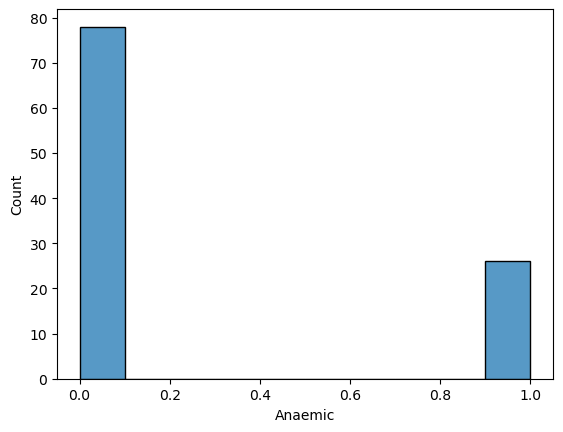

In [39]:
sns.histplot(df, x='Anaemic')
plt.show()

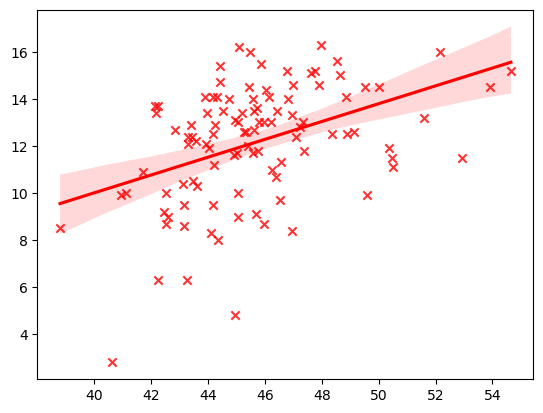

In [40]:
sns.regplot(data=df, 
            x='%Red Pixel', 
            y='Hb',
            color='r', marker='x')
plt.show()

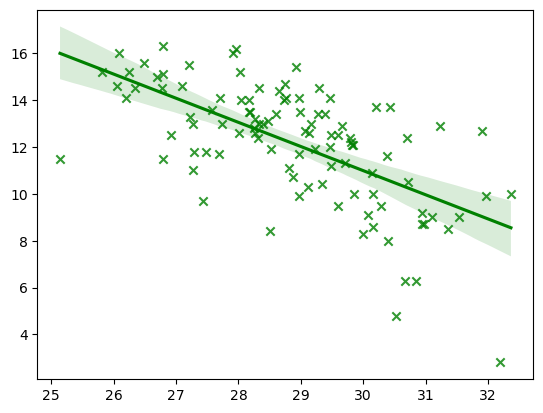

In [41]:
sns.regplot(data=df, 
            x='%Green pixel', 
            y='Hb', 
            color='g', marker='x')

plt.show()

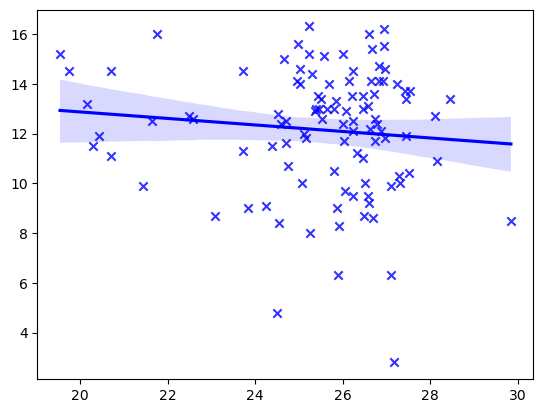

In [42]:
sns.regplot(data=df,
            x='%Blue pixel',
            y='Hb',
            color='b', marker='x')

plt.show()

<Axes: >

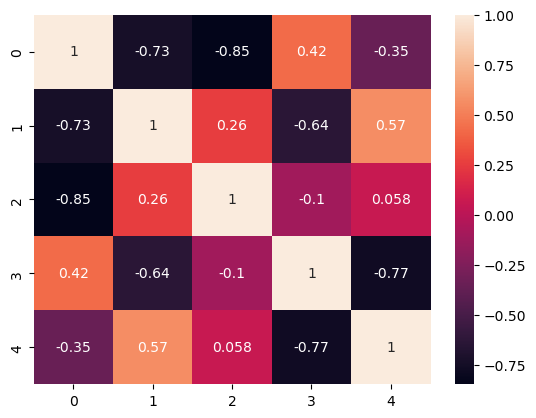

In [50]:
corr = df.corr()
sns.heatmap(corr, annot=True)